作者: 阿凯爱玩机器人 | 微信: xingshunkai  | QQ: 244561792

[B站](https://space.bilibili.com/40344504) | [淘宝店铺](https://shop140985627.taobao.com) | [购买链接](https://item.taobao.com/item.htm?id=677075846402)

## 导入依赖

In [1]:
import numpy as np
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335

%matplotlib inline

pybullet build time: Jun  3 2022 02:05:55


## 相机初始化

In [2]:
# 创建相机对象
camera = Gemini335()

astra配置文件夹路径: ../astra-config/config/
初始化视频流:  color
UVC 相机设备号: 0
检测到产品型号为: Astra Pro
初始化UVC视频流


## 创建人脸检测器

In [3]:
# 创建人脸检测器
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(
		model_selection=0, \
		min_detection_confidence=0.7)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## 获取图像

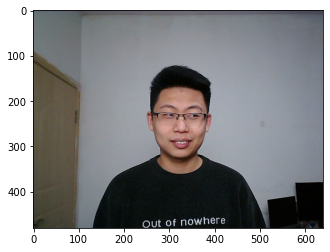

In [172]:
# 采集图像
img_bgr = camera.read_color_img()
# 图像可视化
plt.imshow(img_bgr[:, :, ::-1])

In [173]:
# cv2.imwrite("img_bgr.png", img_bgr)

True

## 人脸检测

In [174]:
# 颜色空间转换 BGR色彩空间转换为RGB色彩空间
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 为了提高性能， 将图像标记为只读模式
img_rgb.flags.writeable = False
# 人脸检测
results = face_detection.process(img_rgb)

# 打印检测结果
print(results.detections)

[label_id: 0
score: 0.9820994138717651
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.4151800274848938
    ymin: 0.42606109380722046
    width: 0.188870370388031
    height: 0.25182753801345825
  }
  relative_keypoints {
    x: 0.4803454875946045
    y: 0.4906887412071228
  }
  relative_keypoints {
    x: 0.5592933893203735
    y: 0.49725836515426636
  }
  relative_keypoints {
    x: 0.5240949392318726
    y: 0.555228054523468
  }
  relative_keypoints {
    x: 0.5193488597869873
    y: 0.6041238307952881
  }
  relative_keypoints {
    x: 0.4226399064064026
    y: 0.5084054470062256
  }
  relative_keypoints {
    x: 0.5924127101898193
    y: 0.5189871788024902
  }
}
]


In [175]:
# 提取第一个检测结果
detection = results.detections[0]
# 获取置信度
score = detection.score[0]
print(f"人脸置信度: {score}")

def get_roi(detection):
    # 获取包围框
    bbox = detection.location_data.relative_bounding_box
    # 将百分比转换为像素
    x = int(bbox.xmin * camera.img_width)
    y = int(bbox.ymin * camera.img_height)
    w = int(bbox.width * camera.img_width)
    h = int(bbox.height * camera.img_height)
    return [x, y, w, h]

[x, y, w, h] = get_roi(detection)
print(f"ROI矩形区域: x={x} y={y} w={w} h={h}")

人脸置信度: 0.9820994138717651
ROI矩形区域: x=265 y=204 w=120 h=120


## 绘制人脸

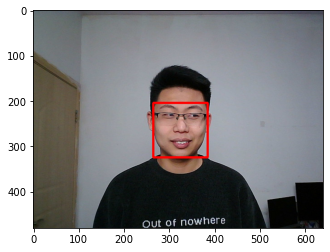

In [176]:
# 绘制人脸的矩形区域
canvas = np.copy(img_bgr)

for detection in results.detections:
    # 提取ROI
    [x, y, w, h] = get_roi(detection)
    # 绘制矩形框
    cv2.rectangle(canvas, (x, y), (x+w, y+h), (0,0,255), thickness=3)

# 绘制图像
plt.imshow(canvas[:, :, ::-1])

In [177]:
# cv2.imwrite("canvas.png", canvas)

True